<a href="https://colab.research.google.com/github/kawachai/VRUNESS/blob/main/TestAug21FaceEmotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import os
# ตัวอย่างของการสร้างข้อมูลเพื่อทำการเก็บภาพอารมณ์
# VRUNESS face emotion by Chai Meenorngwar
# ทำการสร้างที่เก็บภาพ
emotions = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]
source_dir = "raw_images"

# Create the raw_images directory if it doesn't exist
if not os.path.exists(source_dir):
    os.makedirs(source_dir)

# Create subdirectories for each emotion
for emotion in emotions:
    emotion_source_dir = os.path.join(source_dir, emotion)
    if not os.path.exists(emotion_source_dir):
        os.makedirs(emotion_source_dir)

print("Created raw_images directory and emotion subdirectories.")
# กำหนดอารมณ์และโฟลเดอร์ต้นทางที่เก็บภาพ
source_dir = "raw_images"  # โฟลเดอร์ที่มีไฟล์ภาพ
dataset_dir = "dataset"    # โฟลเดอร์ที่จะเก็บ dataset

# สร้างโฟลเดอร์เก็บ dataset ถ้าไม่มี
for emotion in emotions:
    emotion_dir = os.path.join(dataset_dir, emotion)
    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir)

# โหลด Haar Cascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# อ่านและประมวลผลไฟล์ภาพแต่ละอารมณ์
for emotion in emotions:
    emotion_source_dir = os.path.join(source_dir, emotion)
    images = os.listdir(emotion_source_dir)
    count = 0

    for img_name in images:
        img_path = os.path.join(emotion_source_dir, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue

        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

        for (x, y, w, h) in faces:
            face_img = gray[y:y+h, x:x+w]
            face_img = cv2.resize(face_img, (48,48))
            save_path = os.path.join(dataset_dir, emotion, f"{count}.jpg")
            cv2.imwrite(save_path, face_img)
            count += 1

    print(f"เสร็จสิ้นการสร้าง dataset สำหรับอารมณ์ {emotion}, จำนวนภาพ {count} รูป")

print("สร้าง dataset เสร็จสิ้นทั้งหมด")


Created raw_images directory and emotion subdirectories.
เสร็จสิ้นการสร้าง dataset สำหรับอารมณ์ angry, จำนวนภาพ 1 รูป
เสร็จสิ้นการสร้าง dataset สำหรับอารมณ์ disgusted, จำนวนภาพ 1 รูป
เสร็จสิ้นการสร้าง dataset สำหรับอารมณ์ fearful, จำนวนภาพ 1 รูป
เสร็จสิ้นการสร้าง dataset สำหรับอารมณ์ happy, จำนวนภาพ 1 รูป
เสร็จสิ้นการสร้าง dataset สำหรับอารมณ์ neutral, จำนวนภาพ 1 รูป
เสร็จสิ้นการสร้าง dataset สำหรับอารมณ์ sad, จำนวนภาพ 0 รูป
เสร็จสิ้นการสร้าง dataset สำหรับอารมณ์ surprised, จำนวนภาพ 0 รูป
สร้าง dataset เสร็จสิ้นทั้งหมด


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import os
# VRUNESS by  Chai  MEENORNGWAR
# กำหนดชื่ออารมณ์ (สามารถเพิ่มได้)
emotions = ["angry", "disgusted", "fearful", "happy", "neutral", "sad", "surprised"]

# สร้างโฟลเดอร์เก็บภาพถ้าไม่มี
dataset_dir = "dataset"
for emotion in emotions:
    emotion_dir = os.path.join(dataset_dir, emotion)
    if not os.path.exists(emotion_dir):
        os.makedirs(emotion_dir)

# โหลด Haar Cascade สำหรับตรวจจับใบหน้า
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# เปิดกล้อง
cap = cv2.VideoCapture(0)

print("เลือกอารมณ์ที่ต้องการบันทึก:")
for i, e in enumerate(emotions):
    print(f"{i}: {e}")

emotion_index = int(input("กรอกตัวเลขอารมณ์: "))
selected_emotion = emotions[emotion_index]

print(f"เริ่มบันทึกอารมณ์: {selected_emotion}")
count = 0
max_images = 100  # จำนวนภาพที่ต้องการเก็บ

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        face_img = gray[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, (48, 48))
        save_path = os.path.join(dataset_dir, selected_emotion, f"{count}.jpg")
        cv2.imwrite(save_path, face_img)
        count += 1

        # แสดงกรอบและนับจำนวนภาพ
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255,0,0), 2)
        cv2.putText(frame, f"{count}/{max_images}", (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    cv2.imshow("Dataset Creator", frame)

    # ออกจากโปรแกรมถ้า กด 'q' หรือครบจำนวนภาพ
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    if count >= max_images:
        break

cap.release()
cv2.destroyAllWindows()
print(f"บันทึกภาพเสร็จสิ้น จำนวนภาพ: {count} รูป สำหรับอารมณ์ {selected_emotion}")


เลือกอารมณ์ที่ต้องการบันทึก:
0: angry
1: disgusted
2: fearful
3: happy
4: neutral
5: sad
6: surprised
กรอกตัวเลขอารมณ์: 1
เริ่มบันทึกอารมณ์: disgusted
บันทึกภาพเสร็จสิ้น จำนวนภาพ: 0 รูป สำหรับอารมณ์ disgusted


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ----------------------------
# 1. กำหนดโฟลเดอร์ภาพต้นฉบับและโฟลเดอร์เก็บผลลัพธ์
# ----------------------------
input_dir = "raw_images"
output_dir = "augmented_dataset"
os.makedirs(output_dir, exist_ok=True)

# ----------------------------
# 2. ตั้งค่า Data Augmentation
# ----------------------------
datagen = ImageDataGenerator(
    rotation_range=15,          # หมุน ±15°
    width_shift_range=0.1,      # เลื่อนซ้ายขวา 10%
    height_shift_range=0.1,     # เลื่อนขึ้นลง 10%
    brightness_range=[0.7, 1.3],# ปรับความสว่าง
    shear_range=0.1,            # บิดภาพ
    zoom_range=0.1,             # ซูม ±10%
    horizontal_flip=True,       # พลิกซ้ายขวา
    fill_mode='nearest'         # เติมช่องว่าง
)

# ----------------------------
# 3. ประมวลผล Data Augmentation
# ----------------------------
for emotion in os.listdir(input_dir):
    emotion_path = os.path.join(input_dir, emotion)
    if not os.path.isdir(emotion_path):
        continue

    save_path = os.path.join(output_dir, emotion)
    os.makedirs(save_path, exist_ok=True)

    for img_name in os.listdir(emotion_path):
        img_path = os.path.join(emotion_path, img_name)
        img = cv2.imread(img_path)
        if img is None:
            continue

        # แปลงเป็นขนาดมาตรฐาน เช่น 48x48 (สำหรับโมเดล CNN ตรวจจับอารมณ์)
        img = cv2.resize(img, (48, 48))
        img_array = np.expand_dims(img, 0)  # เพิ่มมิติ batch

        # สร้าง Augmented Images 5 รูปต่อ 1 ต้นฉบับ
        aug_iter = datagen.flow(img_array, batch_size=1, save_to_dir=save_path,
                                save_prefix=emotion, save_format='jpg')
        for _ in range(5):
            next(aug_iter)

print("✅ Data Augmentation เสร็จสิ้น — Dataset พร้อมฝึกโมเดล CNN แล้ว!")


✅ Data Augmentation เสร็จสิ้น — Dataset พร้อมฝึกโมเดล CNN แล้ว!


In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# ----------------------------
# 1. โหลด Dataset
# ----------------------------
data_dir = "augmented_dataset"
img_size = 48
X = []
y = []
label_map = {}

for idx, emotion in enumerate(os.listdir(data_dir)):
    label_map[idx] = emotion
    emotion_path = os.path.join(data_dir, emotion)
    for img_name in os.listdir(emotion_path):
        img_path = os.path.join(emotion_path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # แปลงเป็น grayscale
        if img is None:
            continue
        img = cv2.resize(img, (img_size, img_size))
        X.append(img)
        y.append(idx)

X = np.array(X).reshape(-1, img_size, img_size, 1) / 255.0  # Normalize
y = to_categorical(y, num_classes=len(label_map))

print(f"📦 Dataset Loaded: {X.shape[0]} images, {len(label_map)} classes")

# ----------------------------
# 2. แบ่ง Train/Test
# ----------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----------------------------
# 3. สร้างโมเดล CNN
# ----------------------------
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(label_map), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

# ----------------------------
# 4. ฝึกโมเดล
# ----------------------------
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=30, batch_size=32)

# ----------------------------
# 5. บันทึกโมเดล
# ----------------------------
model.save("emotion_cnn_model.h5")
print("✅ โมเดลถูกบันทึกเป็น emotion_cnn_model.h5")

# ----------------------------
# 6. ประเมินผล
# ----------------------------
loss, acc = model.evaluate(X_test, y_test)
print(f"🎯 Test Accuracy: {acc*100:.2f}%")


📦 Dataset Loaded: 35 images, 7 classes


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.0714 - loss: 1.9585 - val_accuracy: 0.0000e+00 - val_loss: 1.9500
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step - accuracy: 0.1071 - loss: 1.9147 - val_accuracy: 0.0000e+00 - val_loss: 1.9151
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step - accuracy: 0.1786 - loss: 1.8362 - val_accuracy: 0.0000e+00 - val_loss: 1.8795
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step - accuracy: 0.2500 - loss: 1.8209 - val_accuracy: 0.1429 - val_loss: 1.8498
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 393ms/step - accuracy: 0.2857 - loss: 1.8089 - val_accuracy: 0.4286 - val_loss: 1.8543
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.1786 - loss: 1.8280 - val_accuracy: 0.1429 - val_loss: 1.8707
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step - accuracy: 0.2500 - loss: 1.8307 - val_accuracy: 0.1429 - val_loss: 1.8501
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step - accuracy: 0.2500 - loss: 1.6954 - val_accuracy: 0.5714 - 

✅ โมเดลถูกบันทึกเป็น emotion_cnn_model.h5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7143 - loss: 0.7176
🎯 Test Accuracy: 71.43%


In [ ]:
# ===============================
# 1. ติดตั้งและ import ไลบรารี
# ===============================
!pip install tensorflow opencv-python-headless

import numpy as np
import cv2
from tensorflow.keras.models import load_model
from google.colab import files

# ===============================
# 2. อัปโหลดโมเดล emotion_cnn_model.h5
# ===============================
uploaded = files.upload()  # เลือก emotion_cnn_model.h5
model = load_model("emotion_cnn_model.h5")

# ===============================
# 3. อัปโหลดภาพที่ต้องการทดสอบ
# ===============================
print("📌 อัปโหลดภาพสำหรับทดสอบ (jpg, png)")
uploaded = files.upload()

# ===============================
# 4. กำหนด Label ของอารมณ์
# ===============================
emotion_labels = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

# ===============================
# 5. ฟังก์ชันทดสอบโมเดล
# ===============================
for filename in uploaded.keys():
    # อ่านภาพ
    img = cv2.imread(filename)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # resize ให้ตรงกับ input ของโมเดล
    face = cv2.resize(gray, (48, 48))
    face = face / 255.0
    face = np.reshape(face, (1, 48, 48, 1))

    # ทำนายผล
    prediction = model.predict(face)
    predicted_label = emotion_labels[np.argmax(prediction)]
    confidence = np.max(prediction)

    print(f"📷 File: {filename}")
    print(f"🔎 Predicted Emotion: {predicted_label} (Confidence: {confidence:.2f})\n")


Saving image1.jpg to image1 (1).jpg
📌 อัปโหลดภาพสำหรับทดสอบ (jpg, png)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
✅ ผลการทำนาย: Neutral (ความมั่นใจ 0.24)


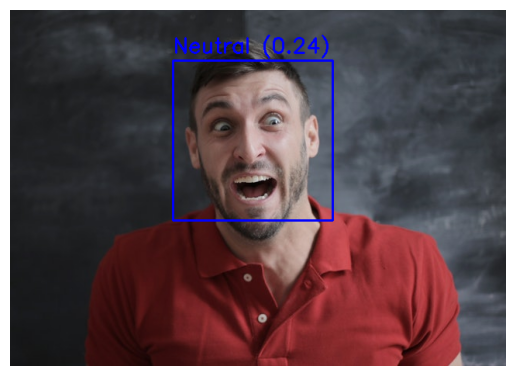

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# โหลดโมเดลที่ฝึกไว้
model = load_model("emotion_cnn_model.h5")

# กำหนด label ของอารมณ์
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# โหลด Haarcascade สำหรับตรวจจับใบหน้า
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# โหลดรูปภาพทดสอบ
img = cv2.imread("image1.jpg")

if img is None:
    print("❌ ไม่พบไฟล์ image1.jpg")
else:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray / 255.0
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 1))

        # ทำนายผล
        prediction = model.predict(roi_gray)
        label = emotion_labels[np.argmax(prediction)]
        confidence = np.max(prediction)

        # แสดงผลบนภาพ
        cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(img, f"{label} ({confidence:.2f})", (x, y-10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        print(f"✅ ผลการทำนาย: {label} (ความมั่นใจ {confidence:.2f})")

    # แสดงภาพผลลัพธ์
    import matplotlib.pyplot as plt
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [ ]:
import numpy as np
from google.colab.patches import cv2_imshow
import argparse
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

mode = "display"

# Create the model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25)) # Keep this dropout as it is in the original training code

model.add(Flatten())
model.add(Dense(1024, activation='relu')) # Keep this Dense layer as it is in the original code
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))

def emotion_recog(frame):
    # Load weights here to ensure the model structure is defined before loading
    model.load_weights('/content/emotion_cnn_model.h5')

    # prevents openCL usage and unnecessary logging messages
    cv2.ocl.setUseOpenCL(False)

    # dictionary which assigns each label an emotion (alphabetical order)
    emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

    #frame = cv2.imread("image1.jpg")
    facecasc = cv2.CascadeClassifier('/content/emotion_recognition/haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = facecasc.detectMultiScale(gray,scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y-50), (x+w, y+h+10), (255, 0, 255), 3)
        roi_gray = gray[y:y + h, x:x + w]
        cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
        prediction = model.predict(cropped_img)
        maxindex = int(np.argmax(prediction))
        cv2.putText(frame, emotion_dict[maxindex], (x+20, y-60), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

    # cv2_imshow(frame)
    return frame

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
input = cv2.imread("/content/image1.jpg")
output = emotion_recog(input)
cv2_imshow(output)

ValueError: Shape mismatch in layer #3 (named dense_8)for weight sequential_4/dense_8/kernel. Weight expects shape (2048, 1024). Received saved weight with shape (2048, 128)

In [ ]:
from pyngrok import ngrok
# Replace "YOUR_AUTHTOKEN" with your actual ngrok authtoken
ngrok.set_auth_token("YOUR_AUTHTOKEN")

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# ----------------------------
# 1. โหลดโมเดลและกำหนดคลาสอารมณ์
# ----------------------------
model = load_model("emotion_cnn_model.h5")

# ต้องกำหนดคลาสตามที่ใช้ฝึกโมเดล
emotion_labels = ['Angry', 'Happy', 'Neutral', 'Sad', 'Surprise']  # แก้ให้ตรงกับ dataset ของคุณ

# โหลด Haar Cascade สำหรับตรวจจับใบหน้า
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# ----------------------------
# 2. เปิดกล้อง Webcam
# ----------------------------
cap = cv2.VideoCapture(0)  # 0 = กล้องหลัก

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  # แปลงภาพเป็นขาวดำ
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # วาดกรอบใบหน้า
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)

        # เตรียมภาพสำหรับโมเดล
        face_img = gray[y:y+h, x:x+w]
        face_img = cv2.resize(face_img, (48, 48))
        face_img = face_img / 255.0
        face_img = np.reshape(face_img, (1, 48, 48, 1))

        # ทำนายอารมณ์
        prediction = model.predict(face_img)
        emotion_index = np.argmax(prediction)
        emotion_text = emotion_labels[emotion_index]
        confidence = np.max(prediction)

        # แสดงข้อความอารมณ์บนภาพ
        cv2.putText(frame, f"{emotion_text} ({confidence*100:.1f}%)",
                    (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    cv2.imshow("Facial Emotion Recognition", frame)

    # กด 'q' เพื่อออก
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [ ]:
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# โหลดโมเดล
model = load_model("emotion_cnn_model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# โหลด Haarcascade สำหรับตรวจจับใบหน้า
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

st.title("📷 Emotion Detection from Image/Video")
st.write("อัปโหลดภาพหรือวิดีโอเพื่อให้ AI ตรวจจับอารมณ์")

# อัปโหลดไฟล์
uploaded_file = st.file_uploader("เลือกไฟล์ภาพหรือวิดีโอ", type=["jpg", "jpeg", "png", "mp4", "avi"])

def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray / 255.0
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 1))
        prediction = model.predict(roi_gray)
        label = emotion_labels[np.argmax(prediction)]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return frame

if uploaded_file is not None:
    file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)

    # ตรวจว่าเป็นภาพหรือวิดีโอ
    if uploaded_file.type.startswith("image"):
        img = cv2.imdecode(file_bytes, 1)
        result_img = detect_emotion(img)
        st.image(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

    elif uploaded_file.type.startswith("video"):
        tfile = f"temp_video.{uploaded_file.name.split('.')[-1]}"
        with open(tfile, "wb") as f:
            f.write(file_bytes)

        cap = cv2.VideoCapture(tfile)
        stframe = st.empty()

        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            result_frame = detect_emotion(frame)
            stframe.image(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
        cap.release()


2025-08-14 13:12:21.553 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 13:12:21.753 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-14 13:12:21.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 13:12:21.759 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 13:12:21.762 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 13:12:21.765 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 13:12:21.766 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-14 13:12:21.770 Thread 'MainThread': mi

In [ ]:
!pip install streamlit opencv-python tensorflow


In [ ]:
!streamlit run app.py

Usage: streamlit run [OPTIONS] TARGET [ARGS]...
Try 'streamlit run --help' for help.

Error: Invalid value: File does not exist: app.py


In [ ]:
# ===============================
# 1. ติดตั้งไลบรารี
# ===============================
!pip install streamlit opencv-python-headless tensorflow pyngrok

# ===============================
# 2. อัปโหลดโมเดล emotion_cnn_model.h5
# ===============================
from google.colab import files
uploaded = files.upload()

# ตรวจสอบไฟล์ที่อัปโหลด
import os
print("Files in directory:", os.listdir())

# ===============================
# 3. สร้างไฟล์ app.py
# ===============================
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tempfile

# โหลดโมเดล
model = load_model("emotion_cnn_model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# โหลด Haarcascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

st.title("📷 Emotion Detection from Image/Video")
st.write("อัปโหลดไฟล์ภาพหรือวิดีโอ แล้วให้ AI ตรวจจับอารมณ์จากใบหน้า")

# ฟังก์ชันตรวจจับอารมณ์
def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray / 255.0
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 1))
        prediction = model.predict(roi_gray)
        label = emotion_labels[np.argmax(prediction)]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return frame

# อัปโหลดไฟล์
uploaded_file = st.file_uploader("เลือกไฟล์", type=["jpg", "jpeg", "png", "mp4", "avi"])

if uploaded_file is not None:
    # ถ้าเป็นรูปภาพ
    if uploaded_file.type.startswith("image"):
        file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
        img = cv2.imdecode(file_bytes, 1)
        result_img = detect_emotion(img)
        st.image(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

    # ถ้าเป็นวิดีโอ
    elif uploaded_file.type.startswith("video"):
        temp_file = tempfile.NamedTemporaryFile(delete=False)
        temp_file.write(uploaded_file.read())
        cap = cv2.VideoCapture(temp_file.name)
        stframe = st.empty()
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            result_frame = detect_emotion(frame)
            stframe.image(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
        cap.release()

# ===============================
# 4. รัน Streamlit ผ่าน ngrok
# ===============================


Saving p14.jpg to p14.jpg
Files in directory: ['.config', 'p14.jpg', '.ipynb_checkpoints', 'p24.jpg', 'raw_images', 'dataset', 'augmented_dataset', 'emotion_cnn_model.h5', 'sample_data']


UsageError: Line magic function `%%writefile` not found.


In [ ]:
%%writefile app.py


Overwriting app.py


In [ ]:
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tempfile

# โหลดโมเดล
model = load_model("emotion_cnn_model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# โหลด Haarcascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

st.title("📷 Emotion Detection from Image/Video")
st.write("อัปโหลดไฟล์ภาพหรือวิดีโอ แล้วให้ AI ตรวจจับอารมณ์จากใบหน้า")

# ฟังก์ชันตรวจจับอารมณ์
def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray / 255.0
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 1))
        prediction = model.predict(roi_gray)
        label = emotion_labels[np.argmax(prediction)]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return frame

# อัปโหลดไฟล์
uploaded_file = st.file_uploader("เลือกไฟล์", type=["jpg", "jpeg", "png", "mp4", "avi"])

if uploaded_file is not None:
    # ถ้าเป็นรูปภาพ
    if uploaded_file.type.startswith("image"):
        file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
        img = cv2.imdecode(file_bytes, 1)
        result_img = detect_emotion(img)
        st.image(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

    # ถ้าเป็นวิดีโอ
    elif uploaded_file.type.startswith("video"):
        temp_file = tempfile.NamedTemporaryFile(delete=False)
        temp_file.write(uploaded_file.read())
        cap = cv2.VideoCapture(temp_file.name)
        stframe = st.empty()
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            result_frame = detect_emotion(frame)
            stframe.image(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
        cap.release()


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# รัน streamlit
!nohup streamlit run app.py --server.port 8501 &

# เปิด public URL
public_url = ngrok.connect(port="8501")
print("Streamlit Web App URL:", public_url)

nohup: appending output to 'nohup.out'


ERROR:pyngrok.process.ngrok:t=2025-08-14T13:35:26+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"


PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
!nohup streamlit run app.py --server.port 8501 &


nohup: appending output to 'nohup.out'


In [ ]:
public_url = ngrok.connect(port="8501")
print("Streamlit Web App URL:", public_url)

ERROR:pyngrok.process.ngrok:t=2025-08-14T13:36:54+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-08-14T13:36:54+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-08-14T13:36:54+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.

In [ ]:
from pyngrok import ngrok


In [ ]:
from pyngrok import ngrok
# Replace "YOUR_AUTHTOKEN" with your actual ngrok authtoken
ngrok.set_auth_token("2dCirJM8rmdxXxtx7IAjLjUXJhe_4vx26UR4beDmLhiaUcUxJ")

In [ ]:
!streamlit run app.py --server.port 8501 & npx localtunnel --port 8501





⠙⠹⠸
  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.237.236.151:8501

⠼⠴⠦⠧⠇⠏⠋Need to install the following packages:
localtunnel@2.0.2
Ok to proceed? (y)   Stopping...
^C


In [ ]:
!nohup streamlit run app.py --server.port 8501 &


nohup: appending output to 'nohup.out'


In [ ]:
from pyngrok import ngrok
public_url = ngrok.connect(8501)
print("Streamlit App URL:", public_url)


Streamlit App URL: NgrokTunnel: "https://f08c39d9e2ca.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# ===============================
# 4. เปิด Streamlit ผ่าน ngrok
# ===============================
from pyngrok import ngrok

# รัน Streamlit
get_ipython().system_raw("streamlit run app.py --server.port 8501 &")

# สร้าง public URL
public_url = ngrok.connect(8501)
print("📌 Streamlit Web App URL:", public_url)


📌 Streamlit Web App URL: NgrokTunnel: "https://f5c05fbcf47c.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
# ===============================
# 1. ติดตั้งไลบรารี
# ===============================
!pip install streamlit opencv-python-headless tensorflow pyngrok

# ===============================
# 2. อัปโหลดโมเดล emotion_cnn_model.h5
# ===============================
from google.colab import files
uploaded = files.upload()  # อัปโหลด emotion_cnn_model.h5

# ตรวจสอบไฟล์
import os
print("Files in directory:", os.listdir())

# ===============================
# 3. สร้างไฟล์ app.py
# ===============================
%%writefile app.py
import streamlit as st
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import tempfile

# โหลดโมเดล
model = load_model("emotion_cnn_model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

# โหลด Haarcascade
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

st.title("📷 Emotion Detection from Image/Video")
st.write("เลือกโหมดอัปโหลด: ภาพหรือวิดีโอ")

# เลือกโหมด
mode = st.radio("โหมดตรวจจับ", ["อัปโหลดภาพ", "อัปโหลดวิดีโอ"])

def detect_emotion(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi_gray = roi_gray / 255.0
        roi_gray = np.reshape(roi_gray, (1, 48, 48, 1))
        prediction = model.predict(roi_gray)
        label = emotion_labels[np.argmax(prediction)]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    return frame

if mode == "อัปโหลดภาพ":
    uploaded_file = st.file_uploader("เลือกไฟล์ภาพ", type=["jpg", "jpeg", "png"])
    if uploaded_file is not None:
        file_bytes = np.asarray(bytearray(uploaded_file.read()), dtype=np.uint8)
        img = cv2.imdecode(file_bytes, 1)
        result_img = detect_emotion(img)
        st.image(cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB))

elif mode == "อัปโหลดวิดีโอ":
    uploaded_file = st.file_uploader("เลือกไฟล์วิดีโอ", type=["mp4", "avi"])
    if uploaded_file is not None:
        temp_file = tempfile.NamedTemporaryFile(delete=False)
        temp_file.write(uploaded_file.read())
        cap = cv2.VideoCapture(temp_file.name)
        stframe = st.empty()
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            result_frame = detect_emotion(frame)
            stframe.image(cv2.cvtColor(result_frame, cv2.COLOR_BGR2RGB))
        cap.release()

# ===============================
# 4. รัน Streamlit ผ่าน ngrok
# ===============================


KeyboardInterrupt: 